In [63]:

import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets,layers,models,MaxPooling
import matplotlib.pyplot as plt


ImportError: cannot import name 'MaxPooling' from 'tensorflow.keras' (C:\Users\HUAWEI\anaconda3\envs\DL\lib\site-packages\keras\api\_v2\keras\__init__.py)

In [6]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 118s 1us/step


(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [10]:
y_train[:5] # the output is 2d so it will change one dim 

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train=y_train.reshape(-1,)
y_train #1d

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [14]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [15]:
classes[0]

'airplane'

In [18]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

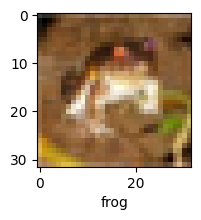

In [19]:
plot_sample(x_train,y_train,0)

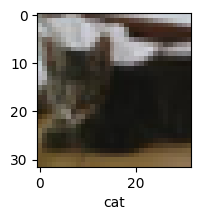

In [20]:
plot_sample(x_train,y_train,9)

In [21]:
x_train=x_train/255
x_test=x_test/255

In [22]:
x_train.shape

(50000, 32, 32, 3)

In [31]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    #layers.MaxPooling((2,2)),
    tf.keras.layers.MaxPool2D((2,2),strides=None,padding="valid"),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2),strides=None,padding="valid"),
                      

    #ann
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    
    layers.Dense(10,activation="softmax"),
])

In [33]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

In [34]:
cnn.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 49s 30ms/step - loss: 1.5102 - accuracy: 0.4585
Epoch 2/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1437 - accuracy: 0.5970
Epoch 3/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0172 - accuracy: 0.6458
Epoch 4/15
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9327 - accuracy: 0.6767
Epoch 5/15
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8624 - accuracy: 0.7022
Epoch 6/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8068 - accuracy: 0.7213
Epoch 7/15
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7604 - accuracy: 0.7379
Epoch 8/15
1563/1563 [==============================] - 46s 30ms/step - loss: 0.7205 - accuracy: 0.7496
Epoch 9/15
1563/1563 [==============================] - 140s 89ms/step - loss: 0.6801 - accuracy: 0.7647
Epoch 10/15
1563/1563 [==============================] - 46s 29

In [35]:
 cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.0044 - accuracy: 0.6940


[1.004397988319397, 0.6940000057220459]

In [36]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [37]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

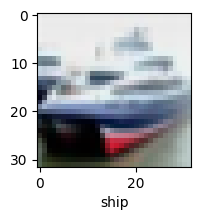

In [38]:
plot_sample(x_test,y_test,1)

In [39]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[1.2778359e-03, 5.8253700e-05, 1.6006673e-04, 8.8032389e-01,
        4.3433844e-05, 8.0295578e-02, 3.7373111e-02, 6.4111432e-06,
        4.0393358e-04, 5.7457750e-05],
       [3.0755356e-03, 1.0621000e-01, 5.9116173e-06, 2.7141123e-09,
        2.8880116e-09, 3.9586140e-11, 4.9620358e-10, 3.5145589e-10,
        8.9058226e-01, 1.2638474e-04],
       [2.8428431e-03, 7.7831753e-02, 7.1717968e-04, 1.1956683e-02,
        2.2468492e-03, 6.7415048e-04, 2.5638432e-04, 1.7445225e-02,
        6.6724110e-01, 2.1878785e-01],
       [9.7709346e-01, 1.6162005e-03, 7.9233376e-03, 1.1008073e-03,
        4.3853451e-03, 3.2680543e-06, 1.5172246e-06, 4.1624383e-04,
        2.5261901e-03, 4.9337163e-03],
       [4.2425473e-08, 2.8961932e-07, 5.9011334e-04, 2.0251273e-04,
        5.5635270e-02, 4.5611472e-05, 9.4351488e-01, 7.6435043e-07,
        2.7590470e-06, 7.6514279e-06]], dtype=float32)

# how do find which is highest probability so we use argmax


In [45]:
#y_classes=np.argmax(y_pred[0])

In [46]:
#y_classes

In [76]:
y_pred=[np.argmax(element) for element in y_pred]
y_pred[:5]

[3, 8, 8, 0, 6]

In [77]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [78]:
classes[y_pred[3]]

'airplane'

In [59]:
from sklearn.metrics import classification_report


In [79]:
print("classifiction report:\n",classification_report(y_test,y_pred))

classifiction report:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.85      0.80      0.82      1000
           2       0.63      0.51      0.56      1000
           3       0.54      0.46      0.50      1000
           4       0.57      0.72      0.63      1000
           5       0.70      0.53      0.61      1000
           6       0.74      0.77      0.76      1000
           7       0.68      0.78      0.73      1000
           8       0.83      0.78      0.80      1000
           9       0.72      0.83      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



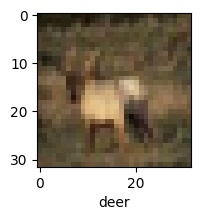

In [70]:
plot_sample(x_train,y_train,3)

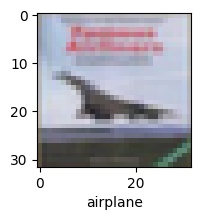

In [75]:
plot_sample(x_test,y_test,3)